In [4]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [28]:
data = pd.read_csv('./encoded_copy.csv',header =0)
data=data.drop(["Unnamed: 0","level_0","Unnamed: 0.1",'index'],axis=1)
data

,State ID,Total_Cases,Total_Death,Year,Disease ID,No. of Doctors
0,111,48602,9,2011,1,4370.000000
1,111,0,0,2004,1,3058.800630
2,111,25978,9,2003,1,3727.000000
3,111,57088,7,2012,1,3060.177228
4,112,20667,200,2016,1,3157.000000
5,112,145047,232,2013,1,3061.554445
6,112,0,0,1999,1,3062.932283
7,112,0,0,2004,1,3064.310740
8,112,555178,3,2009,1,3065.689818
9,112,20456,81,2015,1,3476.000000


In [30]:
features = data[['State ID','Year']]
data = data.drop(['Total_Cases','Total_Death','Disease ID'],axis=1)
label = data[['No. of Doctors']]
data

,State ID,Year,No. of Doctors
0,111,2011,4370.000000
1,111,2004,3058.800630
2,111,2003,3727.000000
3,111,2012,3060.177228
4,112,2016,3157.000000
5,112,2013,3061.554445
6,112,1999,3062.932283
7,112,2004,3064.310740
8,112,2009,3065.689818
9,112,2015,3476.000000


In [31]:
data_dmatrix = xgb.DMatrix(data = features , label = label)

In [33]:
data_dmatrix

In [34]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(features , label,test_size = 0.2 , random_state = 123)

In [36]:
xg_reg = xgb.XGBRegressor(objective = 'reg:linear' , colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [37]:
xg_reg.fit(X_train , y_train)
preds = xg_reg.predict(X_test)

In [41]:
rmse = np.sqrt(mean_squared_error(y_test,preds))
rmse

13785.411991767505

In [47]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.05,
                'max_depth': 20, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [49]:
cv_results.head()


,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,17699.291016,976.979246,17617.355794,2104.323019
1,17492.526693,952.990884,17434.513672,2113.314238
2,17288.483399,937.353479,17252.794271,2110.980574
3,17101.713542,922.992123,17089.260742,2106.846978
4,16958.256511,926.572034,16964.121419,2093.423372


In [50]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

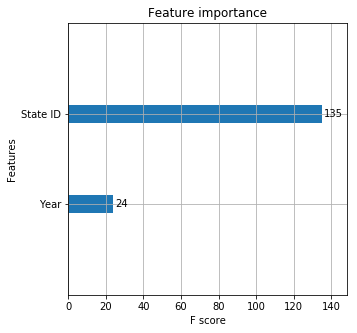

In [51]:
import matplotlib.pyplot as plt
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()


In [52]:
test = [111,1500,2022,1]
preds = xg_reg.predict(test)
preds

AttributeError: 'list' object has no attribute 'feature_names'